Hello, I used the german credit risk dataset of UCI repository.I recognized that the dataset does not contain
any missing or Nan values and every value of each attribute are of same datatype.
Data of some attributes are given in range which are describe categorical values and rest are of numerical
values.I plot few graphs which show the relationship between attributes which are more likely for prediction.
I made userdefine funtion for converting categorical values into numerical values.Then I preferred logistic regression
for this dataset because most of the attribute follws linear relationhip.I used train test split for cross validation of 
70/30.I mentioned comments and heading which would help to understand the code.

# import libraries

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore') #for ignore warnings

In [2]:
from sklearn.preprocessing import LabelEncoder
pd.set_option('max_columns',None)  #funtion to maximum columns of dataset
credit_data_df=pd.read_csv('german_credit_data.txt',delim_whitespace=True) # read dataset

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Frequecy of good and bad customers

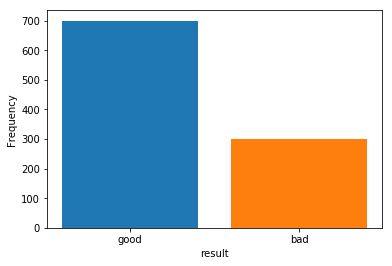

In [4]:
y1=credit_data_df.result[credit_data_df.result==1].count()
y2=credit_data_df.result[credit_data_df.result==2].count()
plt.bar('good',y1)
plt.bar('bad',y2)
plt.xlabel("result")
plt.ylabel("Frequency")
plt.show()

# Frequency of total customer with respect to their age

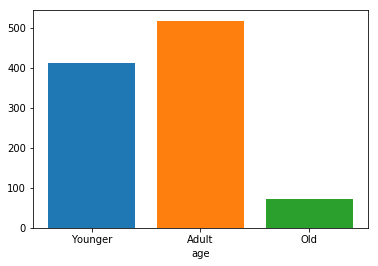

In [5]:
plt.bar('Younger',credit_data_df.age[(credit_data_df.age>=18) & (credit_data_df.age<=30)].count())
plt.bar('Adult',credit_data_df.age[(credit_data_df.age>=31) & (credit_data_df.age<=55)].count())
plt.bar('Old',credit_data_df.age[(credit_data_df.age>55)].count())
plt.xlabel("age")
plt.show()

 # Frequency of people with good status for credit

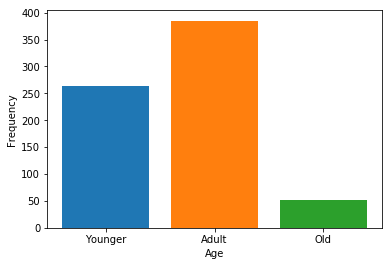

In [6]:
plt.bar('Younger',credit_data_df.age[(credit_data_df.age>=18) & (credit_data_df.age<=30) & (credit_data_df.result==1)].count())
plt.bar('Adult',credit_data_df.age[(credit_data_df.age>=31) & (credit_data_df.age<=55) & (credit_data_df.result==1)].count())
plt.bar('Old',credit_data_df.age[(credit_data_df.age>55) & (credit_data_df.result==1)].count())
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Relatioship between age and credit amount with result status

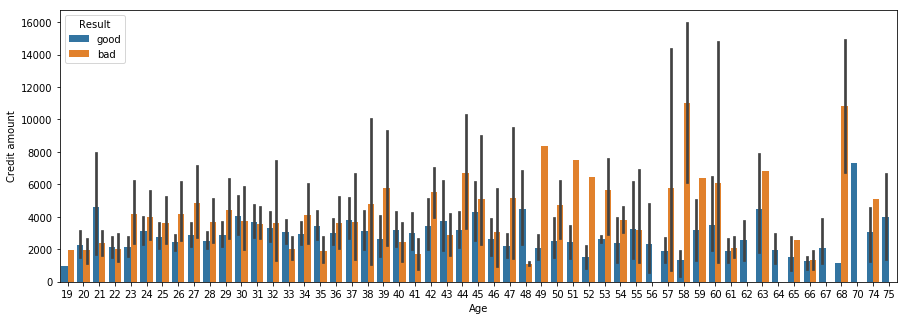

In [7]:
credit_data_df['Result']=credit_data_df.result
credit_data_df['Result'].loc[credit_data_df.Result==1]='good'
credit_data_df['Result'].loc[credit_data_df.Result==2]='bad'

temp=(15,5)
fig,ax=plt.subplots(figsize=temp)

sns.barplot(credit_data_df.age,credit_data_df.Credit_amount,hue=credit_data_df.Result)
plt.ylabel("Credit amount")
plt.xlabel("Age")
plt.show()
credit_data_df.drop(['Result'],axis=1,inplace=True)

# Funtion to convert categorical into numerical

In [8]:
def categorical_to_numerical(lb_object,credit_data_df):
    for col in credit_data_df.columns:
        if credit_data_df[col].dtype==object:  # check the column of object type
            credit_data_df[col]=lb_object.fit_transform(credit_data_df[col]) #fit and transform column
    return credit_data_df  #return transformed dataframe

In [9]:
lb_object=LabelEncoder() #Create lable encoder object
credit_data_df=categorical_to_numerical(lb_object,credit_data_df) #Call above funtion for change categorical to numerical


# Initialize input  and output

In [10]:
X=credit_data_df.drop(['result'],axis=1)  # input all the columns except result comlumn
y=credit_data_df.result  #result column set as output

# Set libraries for model

In [11]:
from sklearn.metrics import accuracy_score,confusion_matrix 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,KFold,cross_val_score

In [12]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
model=LogisticRegression(fit_intercept=True)  #create instance
model.fit(x_train,y_train)                    #fit model on train dataset
predict_value=model.predict(x_test)           #predict value on test dataset  
from sklearn.metrics import accuracy_score
print(" Accuracy score: ",accuracy_score(y_test,predict_value)*100)  #accuracy of model
print("Confusion matrix:\n ",confusion_matrix(y_test,predict_value))  #confusion matrix

 Accuracy score:  77.66666666666666
Confusion matrix:
  [[191  18]
 [ 49  42]]
